 # Decion based models. From decision Tree to Random Forest

### Load the California housing Dataset and Prepare the Data
- Load the California housing dataset from sklearn (`sklearn.datasets.fetch_california_housing()`).
- Separate the features and the target variable, which is 'medv' in this case.
- Analyse the dataset and process different necessary transformations of the data.
- Split the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
cmap = plt.get_cmap('Set3')
from pypalettes import get_hex
from pypalettes import load_cmap
import warnings
warnings.filterwarnings("ignore", category=PendingDeprecationWarning)


In [2]:
dataset = fetch_california_housing(as_frame=True)
#Firstly I will get some information about this dataset, so we can understand how to work with it
print(dataset.DESCR)
dataset.data.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [102]:
dataset.frame.info() #be sure it doesn't have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: xlabel='AveBedrms', ylabel='MedInc'>

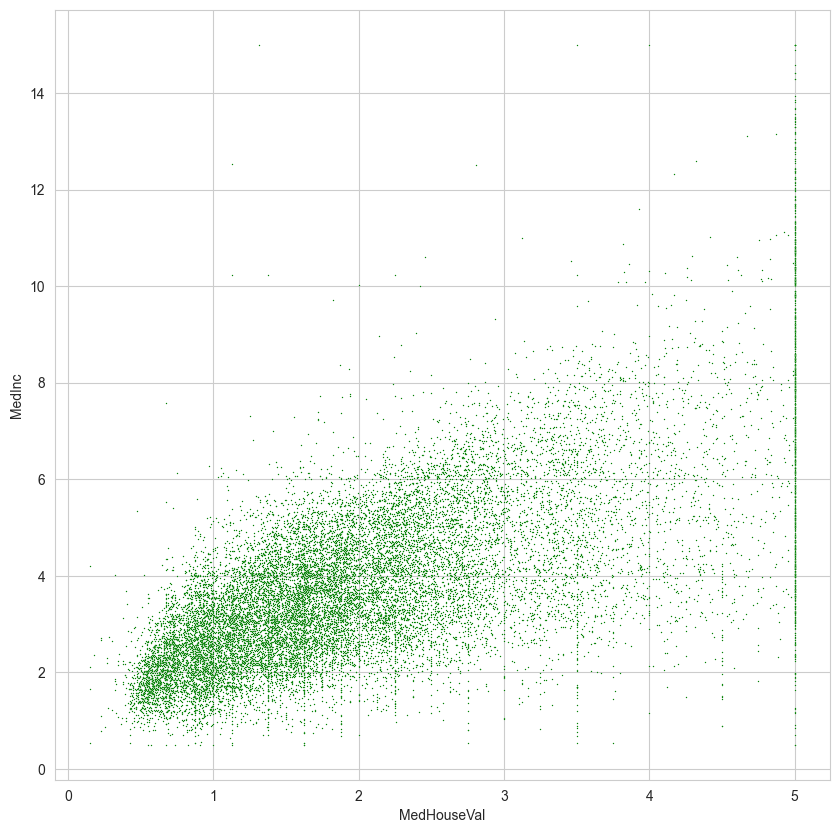

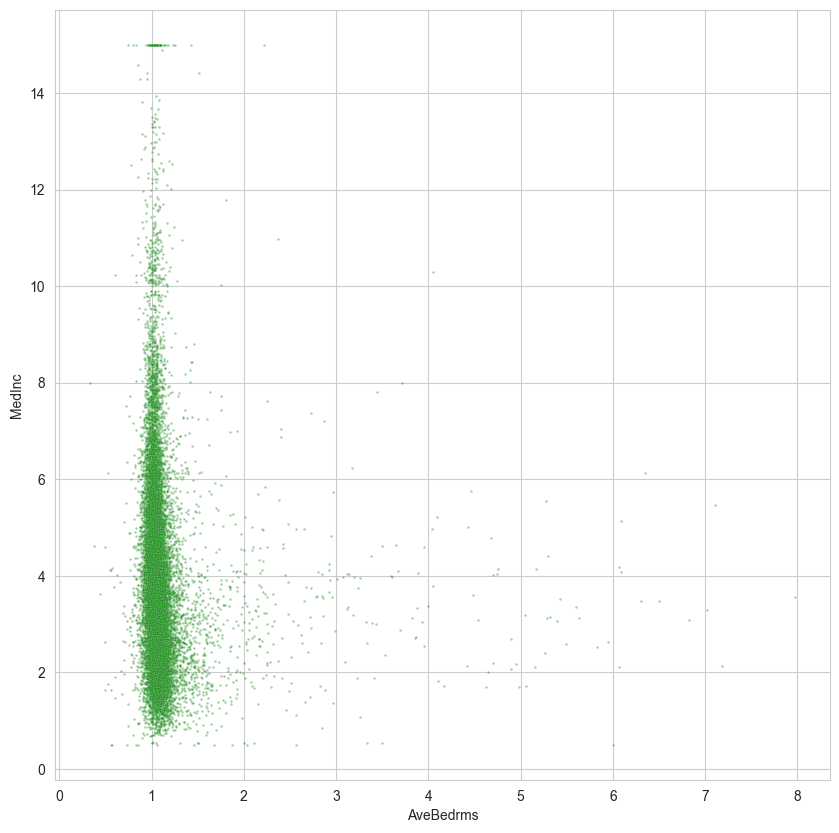

In [3]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MedHouseVal'] = dataset.target

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'MedHouseVal', y = 'MedInc', data = df, s = 1, c = 'green')

filtered_df = df[df['AveBedrms'] <= 8]
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'AveBedrms', y = 'MedInc', data = filtered_df, s = 3, c = 'green', alpha = 0.4)



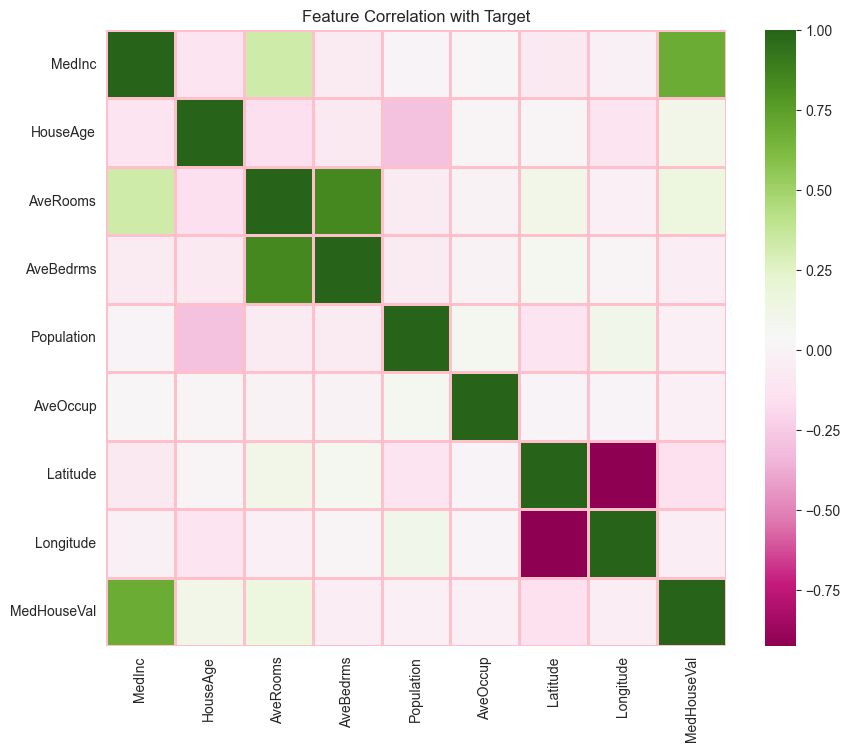

In [4]:
 #Separating features and the target variable which is here MedHouseVal
x = dataset.data
y = dataset.target

corr_matrix = x.copy()
corr_matrix['MedHouseVal'] = y
corr = corr_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, linewidths= 1, linecolor='pink',cmap = 'PiYG')
plt.title("Feature Correlation with Target")
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (14448, 8)
Test set size: (6192, 8)


###  Fit the Regression Tree
- Fit a decision tree to the training data.
- Try to vizualize the behavior of the DT while changing parameters

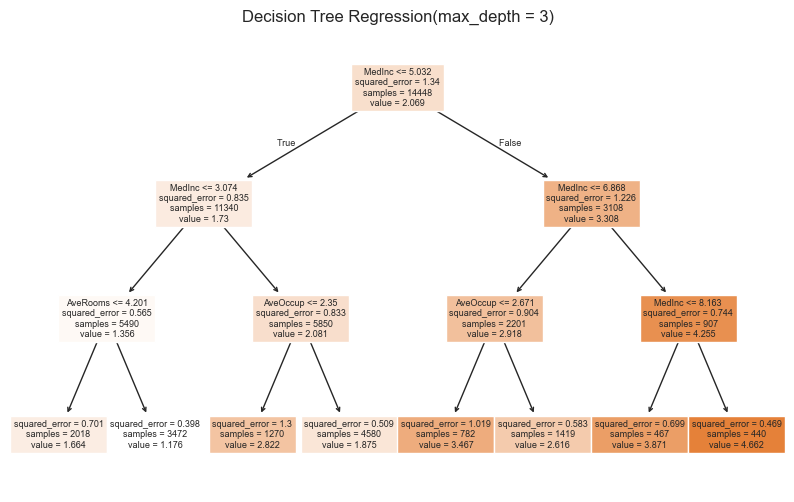

Train MSE: 0.6185735272172733
Test MSE: 0.6325363214073455


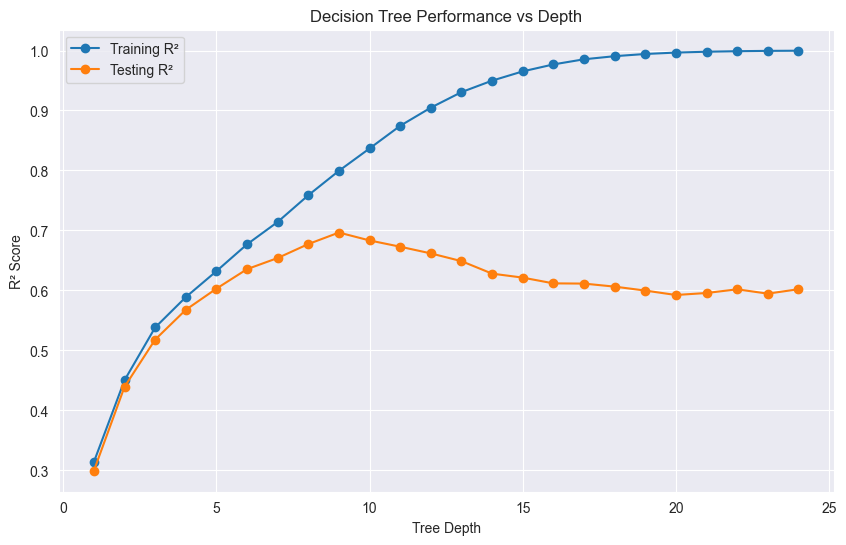

Train R²: 0.5382732070416782
Test R²: 0.5180822912445064


In [ ]:
depths = range(1, 25) #Different max_depth values and track perforance
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(x_train, y_train)

    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

dtr = DecisionTreeRegressor(max_depth=3,random_state=42)
dtr.fit(x_train, y_train)
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)
plt.figure(figsize=(10, 6))
plot_tree(dtr, feature_names=x_train.columns.tolist(), filled=True)
plt.title('Decision Tree Regression(max_depth = 3)')
plt.show()

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Training R²', marker='o')
plt.plot(depths, test_scores, label='Testing R²', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('R² Score')
plt.title('Decision Tree Performance vs Depth')
plt.legend()
plt.grid(True)
plt.show()

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

 ### R² Score (Coefficient of Determination)

- Measures how well the regression model explains the variance in the data.
- **Best score:** 1.0 (perfect prediction)
- **Score of 0.0:** Model predicts the mean of `y` (ignores features)
- **Can be negative:** Model is worse than just predicting the mean

In general, when `y` is not constant, a constant model predicting the average `y` gets a score of 0.0.


### Decision tree without max depth:
!["decision"](img_2.png)



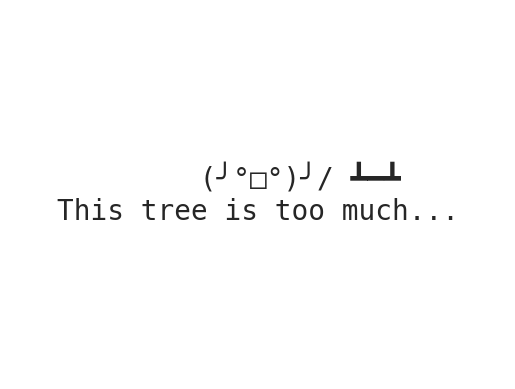

In [7]:
fig, ax = plt.subplots()
ax.axis('off')
reaction = """
     (╯°□°)╯/ ┻━┻
This tree is too much...
"""
ax.text(0.5, 0.5, reaction, fontsize=20, ha='center', va='center', fontfamily='monospace')
plt.show()

### Perform Cost Complexity Pruning
- Apply cost complexity pruning to the regression tree using the appropriate library function : `cost_complexity_pruning_path()`
- Determine the optimal pruning parameter `ccp_alpha` through cross-validation

In [ ]:
path = dtr.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
print(alphas, alphas.shape)

best_ccp_alpha = 0
print(f"Best ccp_alpha: {best_ccp_alpha}")


[0.         0.00981505 0.02103936 0.02526665 0.06174365 0.07947132
 0.10305245 0.42073396] (8,)
Best ccp_alpha: 0


### Analyze the results
- Use the best estimator obtained from cross-validation to make predictions on the test set
- Utilize the `predict()` method of the best estimator to generate predictions for the test data
- Evaluate the Performance of the Model on the Test Set
- Plot the tree to see if its interpretable

Mean Squared Error: 0.5280096503174904
R² Score: 0.5977192261218356


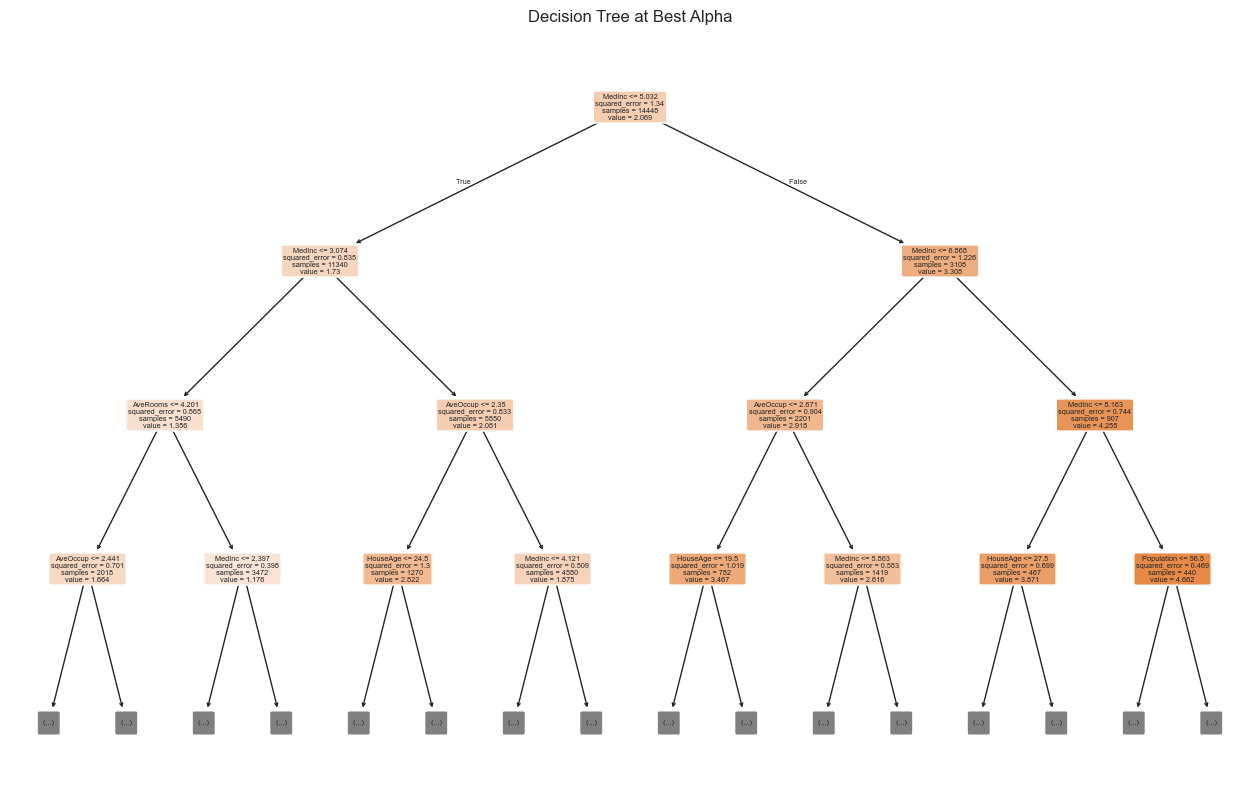

In [ ]:
best_model = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha, random_state=42)
best_model.fit(x_train, y_train)
y_pred_b = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_b)
print(f"Mean Squared Error: {mse}")

r2 = best_model.score(x_test, y_test)
print(f"R² Score: {r2}")

plt.figure(figsize=(16, 10))
plot_tree(best_model, filled=True,rounded = True, feature_names=x_train.columns, max_depth=3)
plt.title("Decision Tree at Best Alpha")
plt.show()

### Some questions

- When learning the tree, we chose a feature to test at each step by maximizing the expected information gain. Does this approach allow us to generate the optimal decision
tree ? Why or why not ? Hint : When playing chess, do you consider only the immediate improvement of your position when deciding on your next move ?

- Why might a Decision Tree work well on a small dataset but perform poorly on a larger one ?

- How does the depth of the tree impact its performance in terms of overfitting and underfitting ?

- How are categorical features handled during splitting ?
 
- In your opinion, why is feature scaling not required when training a Decision Tree ?

- When splitting a node, what happens if all observations have the same target value ?

- What Decision Trees are often described as "white-box models". What does this mean, and why is it beneficial in certain applications ?

- If your dataset is imbalanced, how might this affect the splits chosen by the Decision Tree ? What adjustments could you make to address this ?

##  1. Does maximizing information gain produce the optimal decision tree?

**No, it doesn’t guarantee the globally optimal tree.**

**Why?**
Decision Trees use a *greedy algorithm*, which means they choose the best feature for the current split (highest info gain or lowest error), but don’t think ahead.

**Analogy (Chess):**
It’s like making the best move now without thinking about the next few moves — you might miss a smarter long-term strategy.

What’s Magnus’s favourite ML algorithm? Probably not a greedy one.(cringe, sorry XD)

---

## 2. Why might a Decision Tree perform well on small data but poorly on large datasets?

**Small datasets:**
- Fewer patterns → easier to fit
- Lower risk of overfitting
- More interpretable

**Large datasets (like California Housing):**
- Can overfit noise
- Might not generalize well
- Tree becomes huge and slow

 To fix this, we can prune, use regularization, or switch to ensemble methods like Random Forests.

---

## 3. How does tree depth affect overfitting/underfitting?

- **Shallow tree** → *Underfitting* (misses patterns)
- **Deep tree** → *Overfitting* (memorizes training data, bad on new data)

 In regression, a deep tree might predict perfectly on training house prices but fail on new data.

 Solution: Use **cost-complexity pruning** with `ccp_alpha` to find a good balance.

---

##  4. How are categorical features handled during splitting?

For categorical features, trees check splits like:
- `feature == A`
- `feature in [A, B]`

 In classification, categories can be grouped based on how they affect the target.

 But in the **California Housing dataset**, all features are numeric — unless we make new categories (like binning latitude or longitude into regions).

---

## 5. Why is feature scaling not required for Decision Trees?

**Because trees don’t care about the scale**, only about the **order** of values.

Example:
Whether income is 0–1 or 0–10,000, the split decision stays the same.

 This makes trees great for datasets with features in different units (like income, population, coordinates, etc.).

---

##  6. What happens if all observations at a node have the same target value?

 The node becomes a **leaf node**.

- No more splitting is needed
- Impurity or error = 0
- For regression: if all house prices are the same, there’s nothing more to predict

---

##  7. Why are Decision Trees "white-box" models?

**White-box = explainable.**

We can follow the rules:
> *If income > 5.0 and population < 1000, then...*

In datasets like housing, this helps explain predictions like:
> *High income + low population → high house prices*

This is important in fields like healthcare or finance where decisions must be transparent.

---

##  8. How does an imbalanced dataset affect Decision Tree splits? What can you do?

**In classification:**
- Tree might ignore the minority class and favor the majority.

**In regression (like here):**
- If most prices are low, the tree might ignore the expensive ones.

Fixes:
- Log-transform the target to reduce skew
- Use stratified train/test split (based on price ranges)
- Group regions (using latitude/longitude bins) to include diverse areas in training

---


## Experiment Boostrapping

- Write a function that creates bootstrap samples by randomly sampling data points with replacement from the training set
- Train multiple Decision Tree models, each using a different bootstrap sample
- Generate predictions from each model for a fixed test set and store the results
- Compute the mean, standard deviation, and range of predictions for each test point across the models

       Mean  Standart Deviation    Range
0  0.489010            0.081903  0.60700
1  0.733750            0.211192  1.34900
2  4.866996            0.377952  2.30501
3  2.548620            0.494890  3.48600
4  2.276090            0.308009  1.59500


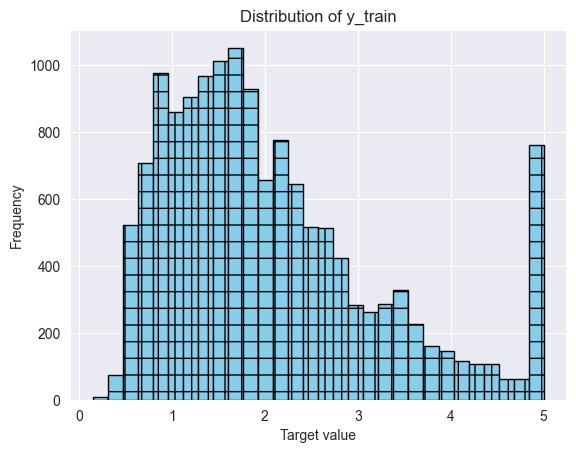

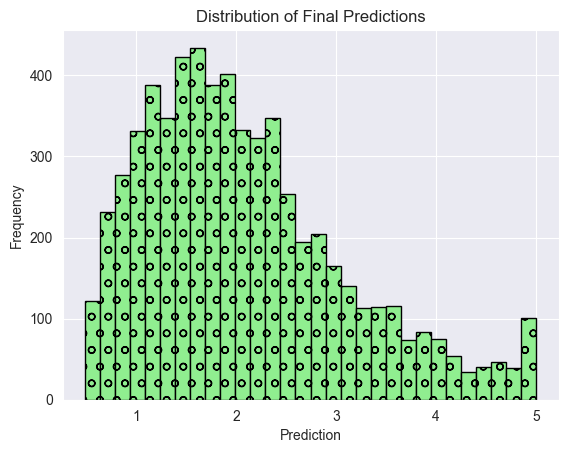

In [ ]:
def generate_bootstrap_sample(x, y):
    n_samples = x.shape[0]
    indices = np.random.choice(n_samples, n_samples, replace=True)
    return x.iloc[indices], y.iloc[indices]

def bootstrap_ensemble(x_train, y_train, x_test, n_models=100):
    all_predictions = []

    for _ in range(n_models):
        x_sample, y_sample = generate_bootstrap_sample(x_train, y_train)

        model = DecisionTreeRegressor(random_state=42)
        model.fit(x_sample, y_sample)

        preds = model.predict(x_test)
        all_predictions.append(preds)

    return np.array(all_predictions)

def summarize_predictions(predictions):
    mean_preds = np.mean(predictions, axis=0)
    std_preds = np.std(predictions, axis=0)
    range_preds = np.ptp(predictions, axis=0)
    return mean_preds, std_preds, range_preds

predictions = bootstrap_ensemble(x_train, y_train, x_test, n_models=100)

mean_preds, std_preds, range_preds = summarize_predictions(predictions)

summary_df = pd.DataFrame({
    'Mean': mean_preds[:5],
    'Standart Deviation': std_preds[:5],
    'Range': range_preds[:5]
})
print(summary_df)

plt.hist(y_train, bins=30, edgecolor='black', color = 'skyblue', hatch = '+')
plt.title('Distribution of y_train')
plt.xlabel('Target value')
plt.ylabel('Frequency')
plt.show()


#Or for predicted values
final_predictions = np.mean(predictions, axis=0)
plt.hist(final_predictions, bins=30, edgecolor='black', color = 'lightgreen', hatch = 'o')
plt.title('Distribution of Final Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

- Create some vizualisation to compare the mean predictions with the true values
- Show the distribution of predictions for a few selected test points

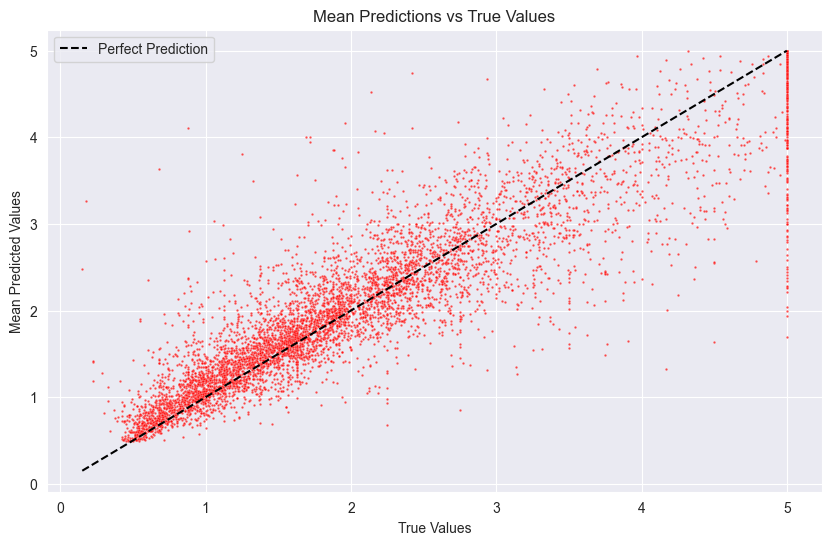

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=final_predictions, color='red', alpha=0.7, s = 3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', label='Perfect Prediction', color='black')
plt.xlabel('True Values')
plt.ylabel('Mean Predicted Values')
plt.title('Mean Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

-We see that at small prediction values data have some linearity, but when this value is increasing, it gets more chaotic order.Also we can see many outliers everywhere

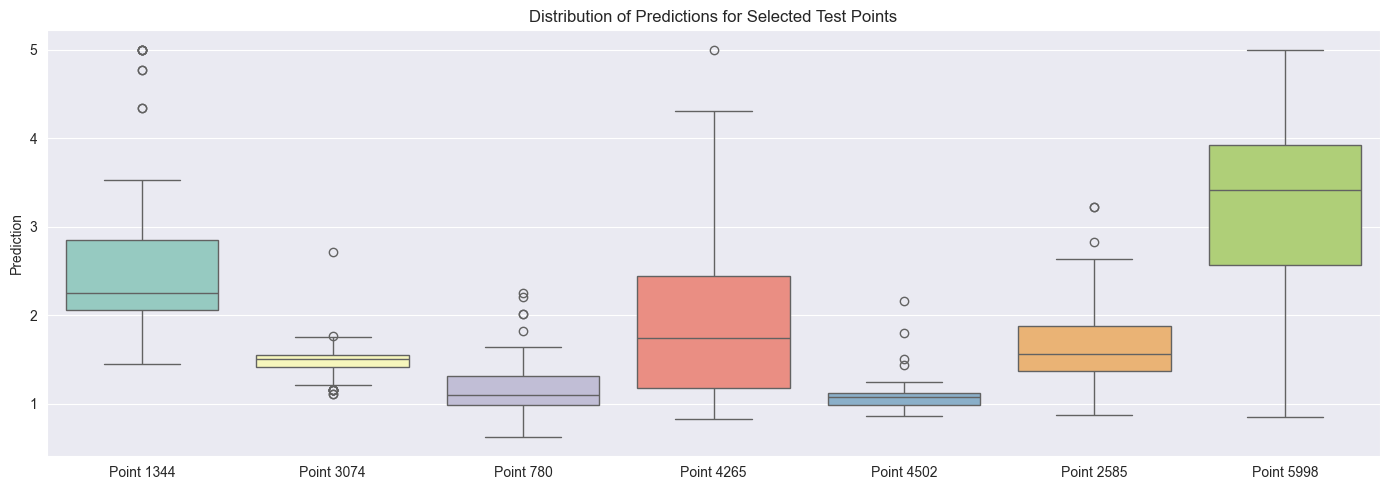

In [12]:
# Boxplot
sample_points = np.random.choice(predictions.shape[1], 7, replace=False)
plt.figure(figsize=(14, 5))
palette = load_cmap("Set3").hex[:7]
sns.boxplot(data=pd.DataFrame(predictions[:, sample_points], columns=[f'Point {i}' for i in sample_points]), palette = palette,
    orient='v')
plt.ylabel('Prediction')
plt.title('Distribution of Predictions for Selected Test Points')
plt.tight_layout()
plt.show()

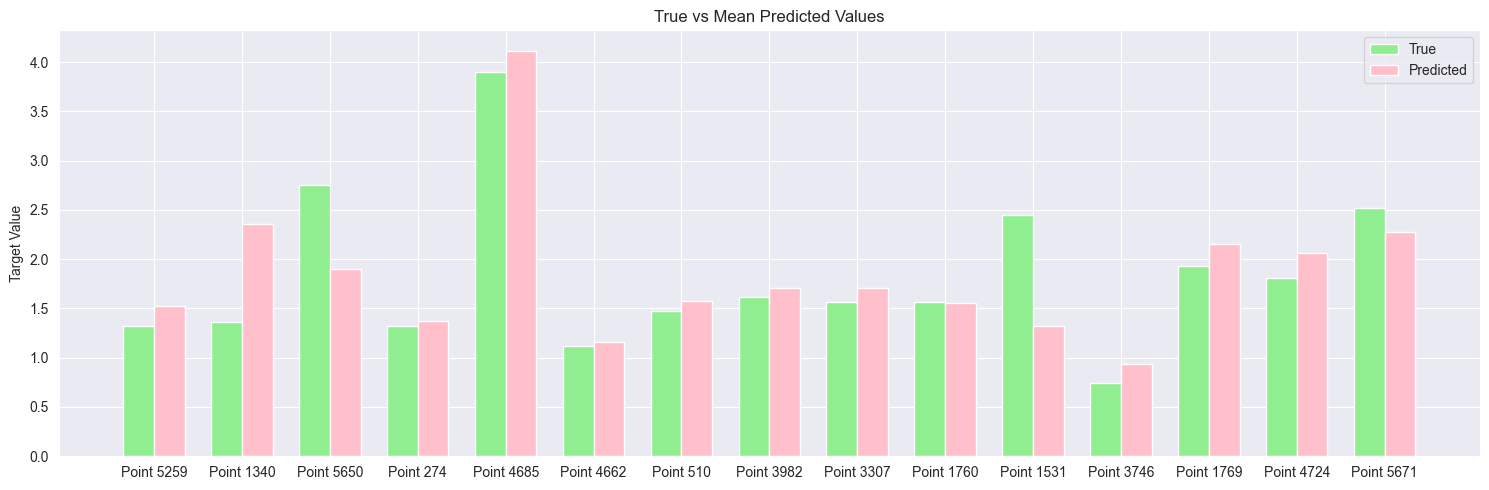

In [13]:
#Bar chart
n = 15
indices = np.random.choice(len(y_test), n, replace=False)
x_axis = np.arange(n)
width = 0.35

plt.figure(figsize=(15, 5))
plt.bar(x_axis - width/2, y_test.iloc[indices], width, label='True', color = 'lightgreen')
plt.bar(x_axis + width/2, mean_preds[indices], width, label='Predicted', color = 'pink')
plt.xticks(x_axis, [f'Point {i}' for i in indices])
plt.ylabel('Target Value')
plt.title('True vs Mean Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()



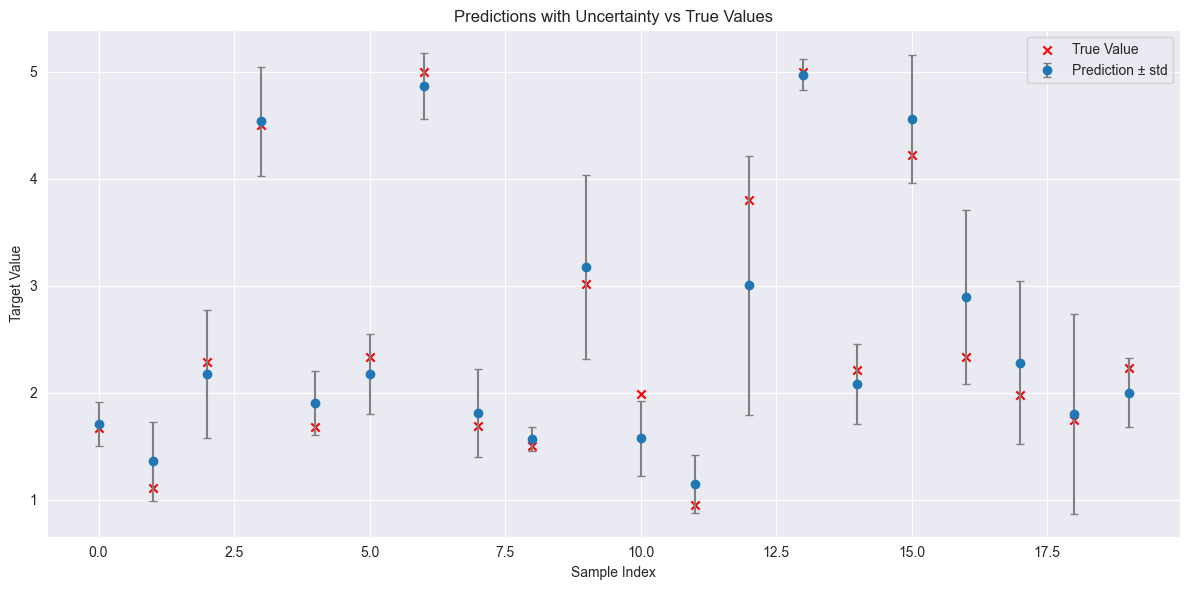

In [14]:
# Error bars: Prediction ± std dev
indices = np.random.choice(len(y_test), 20, replace=False)
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(indices)), mean_preds[indices], yerr=std_preds[indices],fmt='o', ecolor='gray', capsize=3, label='Prediction ± std')
plt.scatter(range(len(indices)), y_test.iloc[indices], color='red', label='True Value', marker='x')
plt.title('Predictions with Uncertainty vs True Values')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.tight_layout()
plt.show()

-Uncertainty refers to the lack of confidence for each output of a machine learning algorithm. While it’s impossible to create an algorithm that has perfect certainty

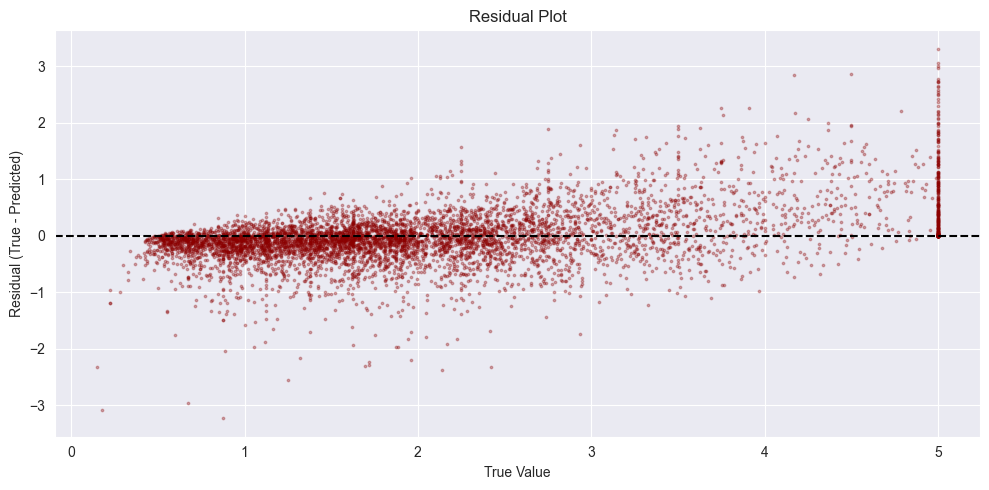

In [15]:
#Residual plot
residuals = y_test - mean_preds
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals, alpha=0.3, color='darkred', s = 3)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('True Value')
plt.ylabel('Residual (True - Predicted)')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

- How does the variance of predictions change across test samples ?
- Why do some test points exhibit higher variance ?
- How does this relate to the overfitting tendency of Decision Trees ?
- How might combining predictions help to reduce variance ?

## Answers:
- Variance is not constant, they show asmany outliers, indicating high variance, while some points of data suggesting low variance.This suggests that the model is more **confident (less variable)** in predicting certain points and more **uncertain (more variable)** for others.
- Sensitivity to small input changes, because we had deep decision tree.And maybe complex features, as we can see there were only 1-2 correlation of medv with other features
- Tree may captures noise instead of true patters.Overfitted tree make predictions that are **very specific to the training data**, this leads to high variance in predictions, especially for points that are not well represented in training
- They combine multiple weak or high-variance predictors to create a more stable prediction; Averaging smooths out noise: the variance of the mean of many predictions is lower than the variance of any individual model; This is why ensembles reduce variance and often prevent overfitting — they take the edge off extreme predictions from any single model.

- Try using a different weak learners with the same setup and compare their prediction variance
- Increase or decrease the number of bootstrap samples. How does this affect the results ?

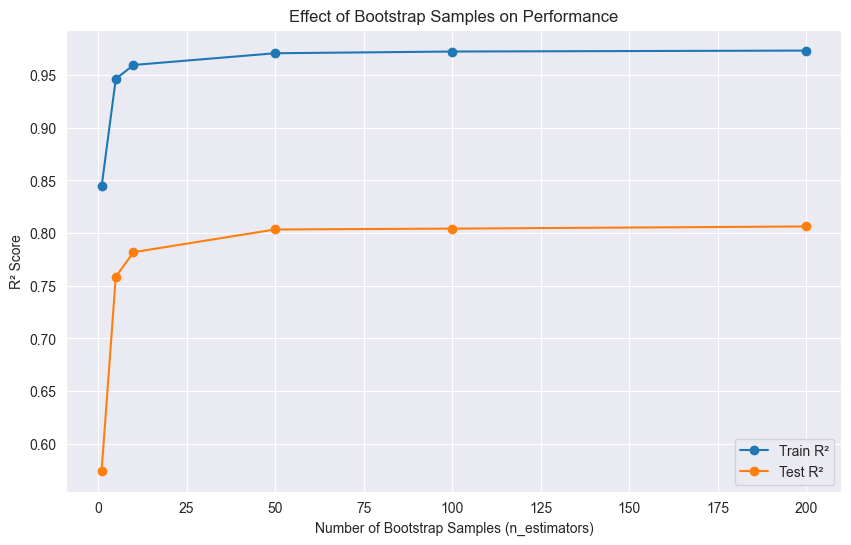

In [ ]:
estimators = [1, 5, 10, 50, 100, 200]
train_scores = []
test_scores = []

for n in estimators:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    bagging.fit(x_train, y_train)
    y_pred = bagging.predict(x_test)
    test_scores.append(r2_score(y_test, y_pred))
    train_scores.append(r2_score(y_train, bagging.predict(x_train)))

plt.figure(figsize=(10, 6))
plt.plot(estimators, train_scores, label='Train R²', marker='o')
plt.plot(estimators, test_scores, label='Test R²', marker='o')
plt.xlabel('Number of Bootstrap Samples (n_estimators)')
plt.ylabel('R² Score')
plt.title('Effect of Bootstrap Samples on Performance')
plt.legend()
plt.grid(True)
plt.show()

**Sweet spot** seems to be around 50 estimators, beyond which performance gains are minimal.

- Effect of Increasing Trees in Bagging :
    - Vizualize the effect of increasing the number of weak learners.
    - Does increasing the number of trees always help ?

In [19]:
import warnings
warnings.filterwarnings("ignore")

weak_learners = {
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

for name, learner in weak_learners.items():
    bagging = BaggingRegressor(
        estimator=learner,
        n_estimators=50,
        random_state=42
    )
    bagging.fit(x_train, y_train)
    y_preds = np.array([estimator.predict(x_test) for estimator in bagging.estimators_])
    prediction_variance = np.var(y_preds, axis=0).mean()
    final_pred = bagging.predict(x_test)
    r2 = r2_score(y_test, final_pred)

    print(f"Model: {name}")
    print(f"  Mean Prediction Variance: {prediction_variance:.4f}")
    print(f"  Test R² Score: {r2:.4f}")
    print("-" * 30)




Model: Decision Tree
  Mean Prediction Variance: 0.0456
  Test R² Score: 0.5468
------------------------------
Model: KNN
  Mean Prediction Variance: 0.2095
  Test R² Score: 0.1603
------------------------------


### Bagging Implementation

- In order to improve the MSE and reduce the variance of the results implement your own Bagging class.

- Recall that Bagging is performed when all predictors (i.e. covariates - features) are used.

In [ ]:
from sklearn.base import clone

class MyBaggingRegressor:
    def __init__(self, base_estimator, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators_ = []

    def fit(self, x, y):
        np.random.seed(self.random_state)
        self.estimators_ = []

        n_samples = x.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            if isinstance(x, pd.DataFrame):
                x_sample = x.iloc[indices]
                y_sample = y.iloc[indices]
            else:
                x_sample = x[indices]
                y_sample = y[indices]

            estimator = clone(self.base_estimator)
            estimator.fit(x_sample, y_sample)
            self.estimators_.append(estimator)

    def predict(self, x):
        predictions = np.array([estimator.predict(x) for estimator in self.estimators_])
        return predictions.mean(axis=0)

    def predict_individuals(self, x):
        return np.array([estimator.predict(x) for estimator in self.estimators_])

In [26]:
model = MyBaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
individual_preds = model.predict_individuals(x_test)
variance = np.var(individual_preds, axis=0).mean()
r2 = r2_score(y_test, y_pred)

print(f"Mean Prediction Variance: {variance:.4f}")
print(f"Test R² Score: {r2:.4f}")

Mean Prediction Variance: 0.0455
Test R² Score: 0.5479


- Fit your Bagging regressor to the training data. Compare it to `DecisionTree` Sklearn built-in class.

In [ ]:
#Bagging Regressor with Decision Tree as base estimator
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_preds = bagging_model.predict(x_test)

#Evaluation metrics
dt_r2 = r2_score(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
bagging_r2 = r2_score(y_test, bagging_preds)
bagging_mse = mean_squared_error(y_test, bagging_preds)

(dt_r2, dt_mse), (bagging_r2, bagging_mse)

((0.5479294707555331, 0.5933607011940029),
 (0.8034991051745937, 0.2579153056796594))

Bagging greatly improves performance over a single Decision Tree by reducing variance. It's a solid choice when using unstable learners like decision trees.

- Effect of Increasing Trees in Bagging : 
    - Vizualize the effect of increasing the number of weak learners. 
    - Does increasing the number of trees always help ?

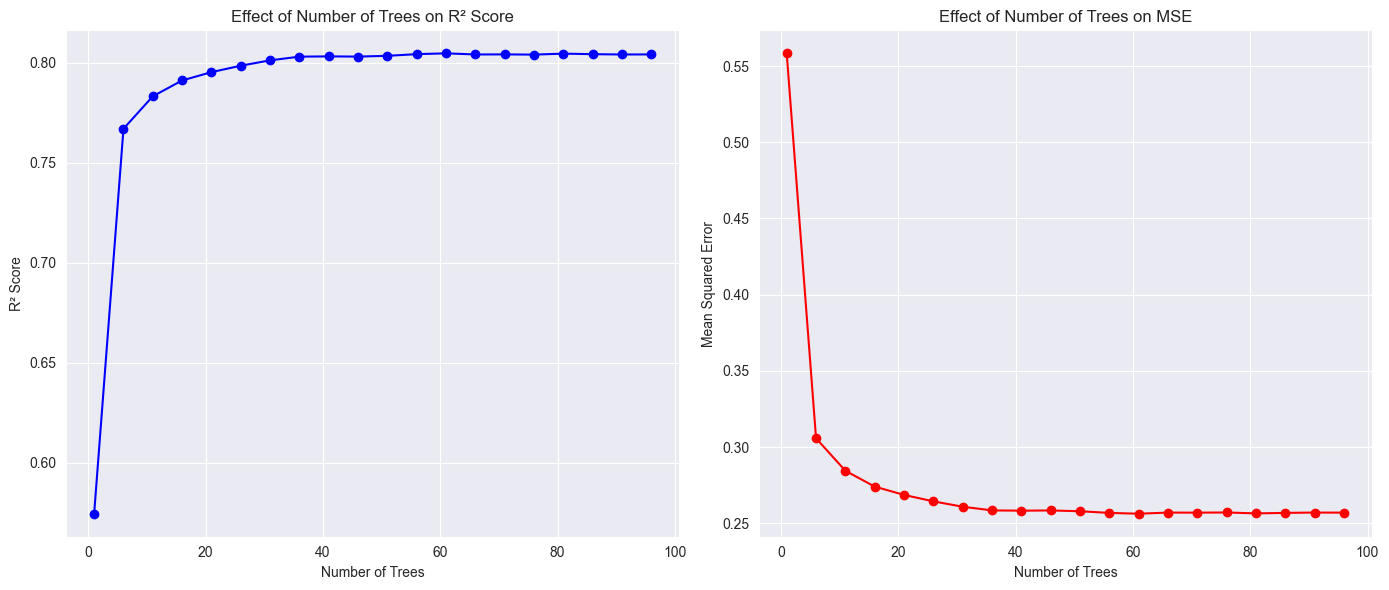

In [ ]:
n_estimators_range = list(range(1, 101, 5))  # From 1 to 100 in steps o 5
r2_scores = []
mse_scores = []

for n in n_estimators_range:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    r2_scores.append(r2_score(y_test, preds))
    mse_scores.append(mean_squared_error(y_test, preds))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, r2_scores, marker='o', color='blue')
plt.title("Effect of Number of Trees on R² Score")
plt.xlabel("Number of Trees")
plt.ylabel("R² Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, mse_scores, marker='o', color='red')
plt.title("Effect of Number of Trees on MSE")
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.grid(True)

plt.tight_layout()
plt.show()


## Conclusion:
- No, increasing the number of trees doesn't always help.
- After a certain point, adding more estimators increases computation time without meaningful gains.
- A sweet spot is usually around 50–60 trees for this dataset.

### Random Forest
Random Forest introduces additional randomness by restricting the number of features that each tree can consider when splitting a node.

Usually, $\sqrt{p}$ features for classification and $p/3$ for regression, where $p$ is the total number of features.

This restriction decorrelates the trees, reducing the chance of overfitting even further.

- Modify your class to chose the maximum number of features to consider when searching for the best split. 

In [ ]:
class MyBaggingRegressor:
    def __init__(self, base_estimator, n_estimators=10, max_features=None, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.random_state = random_state
        self.models = []

def fit(self, x, y):
    np.random.seed(self.random_state)
    self.models = []
    self.feature_indices = []

    for i in range(self.n_estimators):
        # Bootstrap sample
        indices = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x.iloc[indices]
        y_sample = y.iloc[indices]

        # Select random subset of features
        if self.max_features is not None:
            feature_idx = np.random.choice(x.shape[1], self.max_features, replace=False)
        else:
            feature_idx = np.arange(x.shape[1])  # Use all features

        x_sample_subset = x_sample.iloc[:, feature_idx]
        model = clone(self.base_estimator)
        model.fit(x_sample_subset, y_sample)
        self.models.append(model)
        self.feature_indices.append(feature_idx)

def predict(self, x):
    predictions = np.zeros((len(x), self.n_estimators))

    for i, model in enumerate(self.models):
        feature_idx = self.feature_indices[i]
        predictions[:, i] = model.predict(x.iloc[:, feature_idx])

    return predictions.mean(axis=1)


from math import floor

#For example: if p = 8, then max_features = 8 // 3 = 2
max_features = x.shape[1] // 3


- Create a plot displaying the test, train and OOB error resulting from random forests for a more comprehensive range of values for max_features and n_estimators
- Describe the results obtained

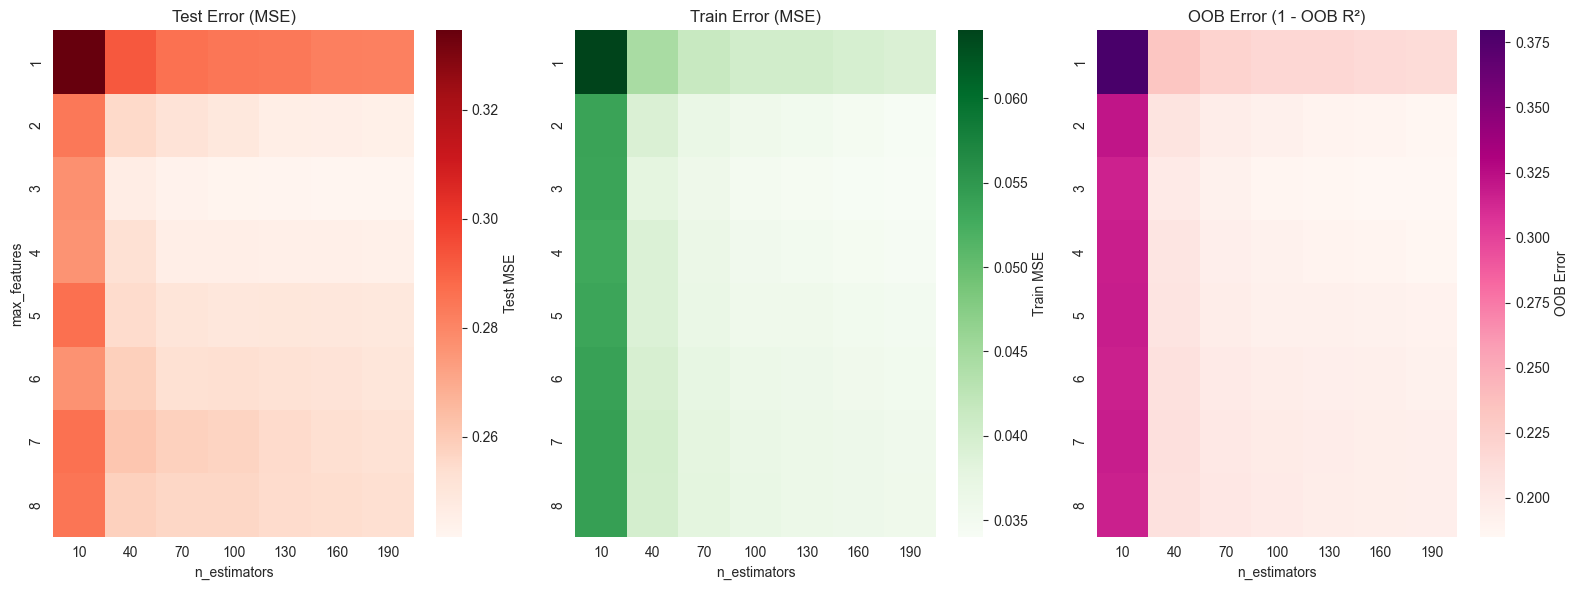

In [ ]:
from sklearn.ensemble import RandomForestRegressor #lazy to go up

max_features_range = list(range(1, x.shape[1] + 1))
n_estimators_range = list(range(10, 201, 30))

results = {
    'max_features': [],
    'n_estimators': [],
    'train_error': [],
    'test_error': [],
    'oob_error': []
}

for max_feat in max_features_range:
    for n_est in n_estimators_range:
        rf = RandomForestRegressor(
            n_estimators=n_est,
            max_features=max_feat,
            oob_score=True,
            bootstrap=True,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(x_train, y_train)

        train_pred = rf.predict(x_train)
        test_pred = rf.predict(x_test)

        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)
        oob_mse = 1 - rf.oob_score_ if hasattr(rf, "oob_score_") else None

        results['max_features'].append(max_feat)
        results['n_estimators'].append(n_est)
        results['train_error'].append(train_mse)
        results['test_error'].append(test_mse)
        results['oob_error'].append(oob_mse)

df_results = pd.DataFrame(results)

plt.figure(figsize=(16, 6))
pivot_test = df_results.pivot(index="max_features", columns="n_estimators", values="test_error")
pivot_train = df_results.pivot(index="max_features", columns="n_estimators", values="train_error")
pivot_oob = df_results.pivot(index="max_features", columns="n_estimators", values="oob_error")

plt.subplot(1, 3, 1)
sns.heatmap(pivot_test, annot=False, cmap="Reds", cbar_kws={"label": "Test MSE"})
plt.title("Test Error (MSE)")
plt.xlabel("n_estimators")
plt.ylabel("max_features")

plt.subplot(1, 3, 2)
sns.heatmap(pivot_train, annot=False, cmap="Greens", cbar_kws={"label": "Train MSE"})
plt.title("Train Error (MSE)")
plt.xlabel("n_estimators")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.heatmap(pivot_oob, annot=False, cmap="RdPu", cbar_kws={"label": "OOB Error"})
plt.title("OOB Error (1 - OOB R²)")
plt.xlabel("n_estimators")
plt.ylabel("")

plt.tight_layout()
plt.show()


- Increasing the number of trees improves performance, but only up to a point. Around 100–130 trees seems to be the sweet spot.

- Increasing max_features too much may lead to overfitting (train error low, test error flattens), but a moderate number (e.g., p/3 rule) works well.

- Out-of-Bag (OOB) error is a great tool for model evaluation without needing a separate test set.

- This validates the bias-variance tradeoff: small max_features = higher bias, large max_features = lower bias but risk of overfitting.

- Visualize the difference in variance between your Decision Tree and Random Forest (which you can replicate with different parameters).

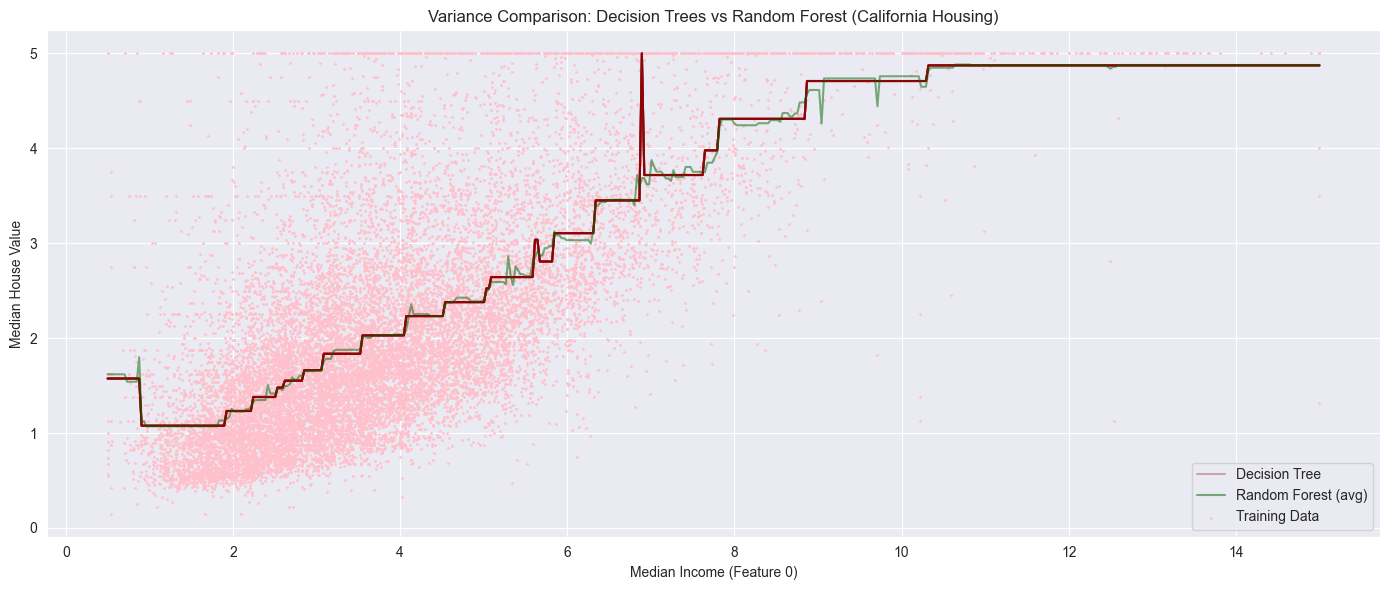

In [ ]:
x_vis = x.iloc[:, [0]] #Use only one feature for visualization(Median Income)

x_train, x_test, y_train, y_test = train_test_split(x_vis, y, test_size=0.2, random_state=42)

x_plot = np.linspace(x_train.min(), x_train.max(), 500).reshape(-1, 1)

trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(x_train, y_train) for i in range(10)]

rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

plt.figure(figsize=(14, 6))

for tree in trees:
    y_pred = tree.predict(x_plot)
    plt.plot(x_plot, y_pred, color='darkred',alpha=0.3, label='Decision Tree' if 'Decision Tree' not in plt.gca().get_legend_handles_labels()[1] else "")

y_rf_pred = rf.predict(x_plot)
plt.plot(x_plot, y_rf_pred, color='darkgreen',alpha = 0.5, label='Random Forest (avg)')

plt.scatter(x_train, y_train, color='pink', s=1, label='Training Data')

plt.title("Variance Comparison: Decision Trees vs Random Forest (California Housing)")
plt.xlabel("Median Income (Feature 0)")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---